In [ ]:
#Scrapping codde

from googleapiclient.discovery import build
import json

service_name="youtube"
version="v3"
api_key="*****"
youtube=build(service_name,version,developerKey=api_key)

video_details=[]
playlist_ids=[]
channel_ids=["UCIPPMRA040LQr5QPyJEbmXA",#mr beast
             "UC85aYbNSFjsJdxfpxgQr8tA",#judo slot
             "UC9YydG57epLqxA9cTzZXSeQ",#cod
]


for channel_id in channel_ids:
    try:
        playlist_request = youtube.playlists().list(
            part="snippet,contentDetails",
            channelId=channel_id,
            maxResults=100
        )
        playlist_response = playlist_request.execute()

        for item in playlist_response['items']:
            if 'id' in item:
                playlist_ids.append(item['id'])

    except Exception as e:
        print(F"Error:{e}")
print(f"Playlist IDs: {playlist_ids}")

for playlist_id in playlist_ids:
    next_page_token=None
    video_count=0
    while True:
        try:
            playlist_items_request = youtube.playlistItems().list(
                    part="snippet,contentDetails",
                    maxResults=2,
                    playlistId=playlist_id,
                    pageToken=next_page_token
                )
            playlist_items_response = playlist_items_request.execute()
            for item in playlist_items_response['items']:
                if video_count < 2:
                    video_id = item['contentDetails']['videoId']
                    video_details_request = youtube.videos().list(
                        part="snippet,contentDetails,statistics",
                        id=video_id
                    )
                    video_details_response = video_details_request.execute()


                    video_details.append(video_details_response)
                    video_count += 1

            next_page_token = playlist_items_response.get('nextPageToken')
            if not next_page_token or video_count >= 2:
                break

        except Exception as e:
            print(f"An error occurred while fetching video details: {e}")
            break


with open('gaming.json', 'w') as file:
    json.dump(video_details, file, indent=4)

print("Video details have been saved")

 sports.json:
    "UC_WKb6N9iTGc77hxwXLDrbA", # Sony sports Network 
    "UCTl3QQTvqHFjurroKxexy2Q", # Olympics  
    "UC14UlmYlSNiQCBe9Eookf_A", # FC barcelona
    "UCWV3obpZVGgJ3j9FVhEjF2Q", # Real madrid
    "UCmqfX0S3x0I3uwLkPdpX03w" # Star sports english
news.json:
    "UCYPvAwZP8pZhSMW8qs7cVCw", #India today
    "UC16niRr50-MSBwiO3YDb3RA" ,#BCC
    "UCZFMm1mMw0F81Z37aaEzTUA", #ndtv
    "UCQXHTFnQYFTqN0MqmNh9EIA", #bcc wwordls service
    "UCJEDFSxHHOW1PpBccdSxOTA" #indian express  
animals.json:
    "UCwmZiChSryoWQCZMIQezgTg", # bcc earth
    "UCpVm7bg6pXKo1Pr6k5kxG9A", #national geographic
    "UCbq-4OJxnziD3awH-aTezeA",#real wild
    "UCQtW2oz8ec8pHjjxawujNjg", #free documentary nature
    "UCz73YrQjemoqx6ZvVfJDAew" #wildlife
coding.json:
    "UCqrILQNl5Ed9Dz6CGMyvMTQ",#clever programmer
    "UCWv7vMbMWH4-V0ZXdmDpPBA",#progr with mosh
    "UC29ju8bIPH5as8OGnQzwJyA",#trvaersy media
    "UCxX9wt5FWQUAAz4UrysqK9A"#cs dojo
food.json:
    "UCiAq_SU0ED1C6vWFMnw8Ekg",# the food range
    "UCcAd5Np7fO8SeejB1FVKcYw",#    best ever food review
    "UCIEv3lZ_tNXHzL3ox-_uUGQ",#gordon ramsy
    "UCyEd6QBSgat5kkC6svyjudA",#mark weins
gaming.json:
    "UCIPPMRA040LQr5QPyJEbmXA",#mr beast
    "UC85aYbNSFjsJdxfpxgQr8tA",#judo slot
    "UC9YydG57epLqxA9cTzZXSeQ",#cod




     

In [ ]:
# Inserting the json files into s3 bucket

import boto3
access_key=""
secret_access_key=""
s3_client=boto3.client('s3',aws_access_key_id=access_key,aws_secret_access_key=secret_access_key)
files=['sports.json','news.json','gaming.json','food.json','coding.json','animals.json']
folder_name='jsonfiles/'
my_bucket='youtubedatafile'
for i in files:   
    key_name=folder_name+i
    try:
        s3_client.upload_file(Filename=i,Bucket=my_bucket,Key=key_name)
        print("inserted successfully")
    except Exception as e:
        print("no")
    
    

In [ ]:
import json
import pandas as pd
with open("sports.json","r") as file:
    f1=json.load(file)
sports=[]
for i in f1:
    if 'items' in i:
        sports.extend(i['items'])
sports_df=pd.json_normalize(sports)
sports_df

In [ ]:
with open("news.json","r") as file:
    f2=json.load(file)
news=[]
for i in f2:
    if 'items' in i:
        news.extend(i['items'])
news_df=pd.json_normalize(news)
news_df

In [ ]:
with open("gaming.json") as file:
    f3=json.load(file)
gaming=[]
for i in f3:
    if 'items' in i:
        gaming.extend(i['items'])
gaming_df=pd.json_normalize(gaming)
gaming_df

In [ ]:
with open("food.json","r") as file:
    f4=json.load(file)
food=[]
for i in f4:
    if 'items' in i:
        food.extend(i['items'])
food_df=pd.json_normalize(food)
food_df


In [ ]:
with open("coding.json","r") as file:
    f5=json.load(file)
coding=[]
for i in f5:
    if 'items' in i:
        coding.extend(i['items'])
coding_df=pd.json_normalize(coding)
coding_df

In [ ]:
with open("animals.json","r") as file:
    f5=json.load(file)
animals=[]
for i in f5:
    if 'items' in i:
        animals.extend(i['items'])
animals_df=pd.json_normalize(animals)
animals_df

In [ ]:
df=pd.concat([sports_df,news_df,gaming_df,food_df,coding_df,animals_df],ignore_index=True)
df

In [ ]:
selected_columns=['id','snippet.channelId','snippet.channelTitle','snippet.title','snippet.thumbnails.medium.url','snippet.tags'
                  ,'statistics.viewCount','statistics.likeCount','statistics.commentCount','contentDetails.duration']
df=df[selected_columns]
df

In [ ]:
df

In [ ]:
df.columns=['Video_Id','Channel_Id','Channel_Title','Title','Url','Tags','View_Count','Like_Count','Comment_Count','Duration']
df.to_csv("Data.csv")

In [ ]:
pip install psycopg2

In [ ]:
pip install sqlalchemy

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Define your PostgreSQL connection details
username = 'postgres'
password = 'Madhan'
host = 'localhost'
port = '5432'
database = 'youtube_data'

# Create the connection string
connection_string = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Load the CSV file into a DataFrame
file_path = 'Data.csv'
df = pd.read_csv(file_path)

# Define the name of the table you want to insert data into
table_name = 'youtube_data'

# Push the data into PostgreSQL
df.to_sql(table_name, engine, if_exists='replace', index=False)

print("Data has been successfully pushed to the PostgreSQL database.")


Data has been successfully pushed to the PostgreSQL database.


In [4]:
df

,Unnamed: 0,Video_Id,Channel_Id,Channel_Title,Title,Url,Tags,View_Count,Like_Count,Comment_Count,Duration
0,0,aFqPPAZcB0g,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,1st Test Day 1 | Highlights | Sri Lanka Tour O...,https://i.ytimg.com/vi/aFqPPAZcB0g/mqdefault.jpg,"['cricket', 'sports', 'cricket highlights', 's...",77053.0,2486.0,24.0,PT19M59S
1,1,h7w-DAjKIW4,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Young Boys vs Galatasaray | Key Moments | UEFA...,https://i.ytimg.com/vi/h7w-DAjKIW4/mqdefault.jpg,"['champions league', 'uefa champions league', ...",788.0,32.0,2.0,PT8M6S
2,2,01J6iADTaM0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Dynamo Kyiv vs FC Salzburg | Key Moments | UEF...,https://i.ytimg.com/vi/01J6iADTaM0/mqdefault.jpg,"['champions league', 'uefa champions league', ...",184.0,6.0,0.0,PT6M40S
3,3,cb6_MGRjx0o,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Bayer Leverkusen vs VfB Stuttgart | Final | Hi...,https://i.ytimg.com/vi/cb6_MGRjx0o/mqdefault.jpg,"['DFL Super Cup', 'DFL Super Cup live', 'DFL S...",9472.0,346.0,10.0,PT10M5S
4,4,_1W3_keYqK0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Real Madrid vs Atalanta | Final | Highlights |...,https://i.ytimg.com/vi/_1W3_keYqK0/mqdefault.jpg,"['uefa super cup', 'super cup', 'football', 'f...",154382.0,3837.0,48.0,PT8M5S
...,...,...,...,...,...,...,...,...,...,...,...
1983,1983,7RzoNyI17M4,UCQtW2oz8ec8pHjjxawujNjg,Free Documentary - Nature,The Big Blue - Ocean Stories from Down Under |...,https://i.ytimg.com/vi/7RzoNyI17M4/mqdefault.jpg,"['Free Documentary', 'Documentaries', 'Full do...",33153.0,623.0,24.0,PT44M9S
1984,1984,gZkcExDOQnY,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Times Mongooses and Cobras Take the Stage,https://i.ytimg.com/vi/gZkcExDOQnY/mqdefault.jpg,NaN,1122.0,18.0,6.0,PT8M7S
1985,1985,BV-6NBLVE6g,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Moments When Hyenas Brutally Attack Babies,https://i.ytimg.com/vi/BV-6NBLVE6g/mqdefault.jpg,NaN,1361.0,24.0,5.0,PT8M4S
1986,1986,4oavOSGo39w,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,Wild Life - Lion Pride Documentary 2020 Full H...,https://i.ytimg.com/vi/4oavOSGo39w/mqdefault.jpg,"['lion documentary', 'lions', 'lions 2020', 'l...",190573.0,2882.0,187.0,PT48M4S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1988 non-null   int64  
 1   Video_Id       1988 non-null   object 
 2   Channel_Id     1988 non-null   object 
 3   Channel_Title  1988 non-null   object 
 4   Title          1988 non-null   object 
 5   Url            1988 non-null   object 
 6   Tags           1855 non-null   object 
 7   View_Count     1986 non-null   float64
 8   Like_Count     1984 non-null   float64
 9   Comment_Count  1981 non-null   float64
 10  Duration       1987 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 171.0+ KB


In [6]:
df.isna().sum()

Unnamed: 0         0
Video_Id           0
Channel_Id         0
Channel_Title      0
Title              0
Url                0
Tags             133
View_Count         2
Like_Count         4
Comment_Count      7
Duration           1
dtype: int64

In [7]:
df[['Tags','View_Count','Like_Count','Comment_Count','Duration']]=df[['Tags','View_Count','Like_Count','Comment_Count','Duration']].fillna('')

In [8]:
df.isna().sum()

Unnamed: 0       0
Video_Id         0
Channel_Id       0
Channel_Title    0
Title            0
Url              0
Tags             0
View_Count       0
Like_Count       0
Comment_Count    0
Duration         0
dtype: int64

In [9]:
df = df.drop_duplicates(subset='Video_Id')
df

,Unnamed: 0,Video_Id,Channel_Id,Channel_Title,Title,Url,Tags,View_Count,Like_Count,Comment_Count,Duration
0,0,aFqPPAZcB0g,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,1st Test Day 1 | Highlights | Sri Lanka Tour O...,https://i.ytimg.com/vi/aFqPPAZcB0g/mqdefault.jpg,"['cricket', 'sports', 'cricket highlights', 's...",77053.0,2486.0,24.0,PT19M59S
1,1,h7w-DAjKIW4,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Young Boys vs Galatasaray | Key Moments | UEFA...,https://i.ytimg.com/vi/h7w-DAjKIW4/mqdefault.jpg,"['champions league', 'uefa champions league', ...",788.0,32.0,2.0,PT8M6S
2,2,01J6iADTaM0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Dynamo Kyiv vs FC Salzburg | Key Moments | UEF...,https://i.ytimg.com/vi/01J6iADTaM0/mqdefault.jpg,"['champions league', 'uefa champions league', ...",184.0,6.0,0.0,PT6M40S
3,3,cb6_MGRjx0o,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Bayer Leverkusen vs VfB Stuttgart | Final | Hi...,https://i.ytimg.com/vi/cb6_MGRjx0o/mqdefault.jpg,"['DFL Super Cup', 'DFL Super Cup live', 'DFL S...",9472.0,346.0,10.0,PT10M5S
4,4,_1W3_keYqK0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Real Madrid vs Atalanta | Final | Highlights |...,https://i.ytimg.com/vi/_1W3_keYqK0/mqdefault.jpg,"['uefa super cup', 'super cup', 'football', 'f...",154382.0,3837.0,48.0,PT8M5S
...,...,...,...,...,...,...,...,...,...,...,...
1980,1980,dz3eGdW_s64,UCQtW2oz8ec8pHjjxawujNjg,Free Documentary - Nature,The Big Blue - Ocean Stories from Down Under |...,https://i.ytimg.com/vi/dz3eGdW_s64/mqdefault.jpg,"['Free Documentary', 'Documentaries', 'Full do...",6443.0,202.0,9.0,PT43M41S
1984,1984,gZkcExDOQnY,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Times Mongooses and Cobras Take the Stage,https://i.ytimg.com/vi/gZkcExDOQnY/mqdefault.jpg,,1122.0,18.0,6.0,PT8M7S
1985,1985,BV-6NBLVE6g,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Moments When Hyenas Brutally Attack Babies,https://i.ytimg.com/vi/BV-6NBLVE6g/mqdefault.jpg,,1361.0,24.0,5.0,PT8M4S
1986,1986,4oavOSGo39w,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,Wild Life - Lion Pride Documentary 2020 Full H...,https://i.ytimg.com/vi/4oavOSGo39w/mqdefault.jpg,"['lion documentary', 'lions', 'lions 2020', 'l...",190573.0,2882.0,187.0,PT48M4S


In [10]:
df

,Unnamed: 0,Video_Id,Channel_Id,Channel_Title,Title,Url,Tags,View_Count,Like_Count,Comment_Count,Duration
0,0,aFqPPAZcB0g,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,1st Test Day 1 | Highlights | Sri Lanka Tour O...,https://i.ytimg.com/vi/aFqPPAZcB0g/mqdefault.jpg,"['cricket', 'sports', 'cricket highlights', 's...",77053.0,2486.0,24.0,PT19M59S
1,1,h7w-DAjKIW4,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Young Boys vs Galatasaray | Key Moments | UEFA...,https://i.ytimg.com/vi/h7w-DAjKIW4/mqdefault.jpg,"['champions league', 'uefa champions league', ...",788.0,32.0,2.0,PT8M6S
2,2,01J6iADTaM0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Dynamo Kyiv vs FC Salzburg | Key Moments | UEF...,https://i.ytimg.com/vi/01J6iADTaM0/mqdefault.jpg,"['champions league', 'uefa champions league', ...",184.0,6.0,0.0,PT6M40S
3,3,cb6_MGRjx0o,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Bayer Leverkusen vs VfB Stuttgart | Final | Hi...,https://i.ytimg.com/vi/cb6_MGRjx0o/mqdefault.jpg,"['DFL Super Cup', 'DFL Super Cup live', 'DFL S...",9472.0,346.0,10.0,PT10M5S
4,4,_1W3_keYqK0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Real Madrid vs Atalanta | Final | Highlights |...,https://i.ytimg.com/vi/_1W3_keYqK0/mqdefault.jpg,"['uefa super cup', 'super cup', 'football', 'f...",154382.0,3837.0,48.0,PT8M5S
...,...,...,...,...,...,...,...,...,...,...,...
1980,1980,dz3eGdW_s64,UCQtW2oz8ec8pHjjxawujNjg,Free Documentary - Nature,The Big Blue - Ocean Stories from Down Under |...,https://i.ytimg.com/vi/dz3eGdW_s64/mqdefault.jpg,"['Free Documentary', 'Documentaries', 'Full do...",6443.0,202.0,9.0,PT43M41S
1984,1984,gZkcExDOQnY,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Times Mongooses and Cobras Take the Stage,https://i.ytimg.com/vi/gZkcExDOQnY/mqdefault.jpg,,1122.0,18.0,6.0,PT8M7S
1985,1985,BV-6NBLVE6g,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Moments When Hyenas Brutally Attack Babies,https://i.ytimg.com/vi/BV-6NBLVE6g/mqdefault.jpg,,1361.0,24.0,5.0,PT8M4S
1986,1986,4oavOSGo39w,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,Wild Life - Lion Pride Documentary 2020 Full H...,https://i.ytimg.com/vi/4oavOSGo39w/mqdefault.jpg,"['lion documentary', 'lions', 'lions 2020', 'l...",190573.0,2882.0,187.0,PT48M4S


In [11]:
cleaned_df=df
cleaned_df

,Unnamed: 0,Video_Id,Channel_Id,Channel_Title,Title,Url,Tags,View_Count,Like_Count,Comment_Count,Duration
0,0,aFqPPAZcB0g,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,1st Test Day 1 | Highlights | Sri Lanka Tour O...,https://i.ytimg.com/vi/aFqPPAZcB0g/mqdefault.jpg,"['cricket', 'sports', 'cricket highlights', 's...",77053.0,2486.0,24.0,PT19M59S
1,1,h7w-DAjKIW4,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Young Boys vs Galatasaray | Key Moments | UEFA...,https://i.ytimg.com/vi/h7w-DAjKIW4/mqdefault.jpg,"['champions league', 'uefa champions league', ...",788.0,32.0,2.0,PT8M6S
2,2,01J6iADTaM0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Dynamo Kyiv vs FC Salzburg | Key Moments | UEF...,https://i.ytimg.com/vi/01J6iADTaM0/mqdefault.jpg,"['champions league', 'uefa champions league', ...",184.0,6.0,0.0,PT6M40S
3,3,cb6_MGRjx0o,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Bayer Leverkusen vs VfB Stuttgart | Final | Hi...,https://i.ytimg.com/vi/cb6_MGRjx0o/mqdefault.jpg,"['DFL Super Cup', 'DFL Super Cup live', 'DFL S...",9472.0,346.0,10.0,PT10M5S
4,4,_1W3_keYqK0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Real Madrid vs Atalanta | Final | Highlights |...,https://i.ytimg.com/vi/_1W3_keYqK0/mqdefault.jpg,"['uefa super cup', 'super cup', 'football', 'f...",154382.0,3837.0,48.0,PT8M5S
...,...,...,...,...,...,...,...,...,...,...,...
1980,1980,dz3eGdW_s64,UCQtW2oz8ec8pHjjxawujNjg,Free Documentary - Nature,The Big Blue - Ocean Stories from Down Under |...,https://i.ytimg.com/vi/dz3eGdW_s64/mqdefault.jpg,"['Free Documentary', 'Documentaries', 'Full do...",6443.0,202.0,9.0,PT43M41S
1984,1984,gZkcExDOQnY,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Times Mongooses and Cobras Take the Stage,https://i.ytimg.com/vi/gZkcExDOQnY/mqdefault.jpg,,1122.0,18.0,6.0,PT8M7S
1985,1985,BV-6NBLVE6g,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Moments When Hyenas Brutally Attack Babies,https://i.ytimg.com/vi/BV-6NBLVE6g/mqdefault.jpg,,1361.0,24.0,5.0,PT8M4S
1986,1986,4oavOSGo39w,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,Wild Life - Lion Pride Documentary 2020 Full H...,https://i.ytimg.com/vi/4oavOSGo39w/mqdefault.jpg,"['lion documentary', 'lions', 'lions 2020', 'l...",190573.0,2882.0,187.0,PT48M4S


In [12]:
import pandas as pd
from sqlalchemy import create_engine

# Define your PostgreSQL connection details
username = 'postgres'
password = 'Madhan'
host = 'localhost'
port = '5432'
database = 'youtube_data'

# Create the connection string
connection_string = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)
table_name = 'cleaned_youtube_data'

# Push the data into PostgreSQL
cleaned_df.to_sql(table_name, engine, if_exists='replace', index=False)

print("Data has been successfully pushed to the PostgreSQL database.")


Data has been successfully pushed to the PostgreSQL database.


In [13]:
cleaned_df['Tags']

0       ['cricket', 'sports', 'cricket highlights', 's...
1       ['champions league', 'uefa champions league', ...
2       ['champions league', 'uefa champions league', ...
3       ['DFL Super Cup', 'DFL Super Cup live', 'DFL S...
4       ['uefa super cup', 'super cup', 'football', 'f...
                              ...                        
1980    ['Free Documentary', 'Documentaries', 'Full do...
1984                                                     
1985                                                     
1986    ['lion documentary', 'lions', 'lions 2020', 'l...
1987    ['lion documentary', 'lions', 'lions 2020', 'l...
Name: Tags, Length: 1937, dtype: object

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
cleaned_df.loc[:, 'Tags'] = cleaned_df['Tags'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", "").replace(",", "").replace("-","").replace("(","").replace(")","").replace('"',""))

In [15]:
cleaned_df

,Unnamed: 0,Video_Id,Channel_Id,Channel_Title,Title,Url,Tags,View_Count,Like_Count,Comment_Count,Duration
0,0,aFqPPAZcB0g,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,1st Test Day 1 | Highlights | Sri Lanka Tour O...,https://i.ytimg.com/vi/aFqPPAZcB0g/mqdefault.jpg,cricket sports cricket highlights sports highl...,77053.0,2486.0,24.0,PT19M59S
1,1,h7w-DAjKIW4,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Young Boys vs Galatasaray | Key Moments | UEFA...,https://i.ytimg.com/vi/h7w-DAjKIW4/mqdefault.jpg,champions league uefa champions league uefa ch...,788.0,32.0,2.0,PT8M6S
2,2,01J6iADTaM0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Dynamo Kyiv vs FC Salzburg | Key Moments | UEF...,https://i.ytimg.com/vi/01J6iADTaM0/mqdefault.jpg,champions league uefa champions league uefa ch...,184.0,6.0,0.0,PT6M40S
3,3,cb6_MGRjx0o,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Bayer Leverkusen vs VfB Stuttgart | Final | Hi...,https://i.ytimg.com/vi/cb6_MGRjx0o/mqdefault.jpg,DFL Super Cup DFL Super Cup live DFL Super Cup...,9472.0,346.0,10.0,PT10M5S
4,4,_1W3_keYqK0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Real Madrid vs Atalanta | Final | Highlights |...,https://i.ytimg.com/vi/_1W3_keYqK0/mqdefault.jpg,uefa super cup super cup football football mat...,154382.0,3837.0,48.0,PT8M5S
...,...,...,...,...,...,...,...,...,...,...,...
1980,1980,dz3eGdW_s64,UCQtW2oz8ec8pHjjxawujNjg,Free Documentary - Nature,The Big Blue - Ocean Stories from Down Under |...,https://i.ytimg.com/vi/dz3eGdW_s64/mqdefault.jpg,Free Documentary Documentaries Full documentar...,6443.0,202.0,9.0,PT43M41S
1984,1984,gZkcExDOQnY,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Times Mongooses and Cobras Take the Stage,https://i.ytimg.com/vi/gZkcExDOQnY/mqdefault.jpg,,1122.0,18.0,6.0,PT8M7S
1985,1985,BV-6NBLVE6g,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Moments When Hyenas Brutally Attack Babies,https://i.ytimg.com/vi/BV-6NBLVE6g/mqdefault.jpg,,1361.0,24.0,5.0,PT8M4S
1986,1986,4oavOSGo39w,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,Wild Life - Lion Pride Documentary 2020 Full H...,https://i.ytimg.com/vi/4oavOSGo39w/mqdefault.jpg,lion documentary lions lions 2020 lion documen...,190573.0,2882.0,187.0,PT48M4S


In [16]:
cleaned_df["Tags"]

0       cricket sports cricket highlights sports highl...
1       champions league uefa champions league uefa ch...
2       champions league uefa champions league uefa ch...
3       DFL Super Cup DFL Super Cup live DFL Super Cup...
4       uefa super cup super cup football football mat...
                              ...                        
1980    Free Documentary Documentaries Full documentar...
1984                                                     
1985                                                     
1986    lion documentary lions lions 2020 lion documen...
1987    lion documentary lions lions 2020 lion documen...
Name: Tags, Length: 1937, dtype: object

In [16]:
for rows in cleaned_df['Tags']:
    print(rows)

cricket sports cricket highlights sports highlights cricket matches test matches england cricket sri lanka cricket england sri lanka eng vs sl england vs sri lanka cricket live cricket now england team Sri Lanka Tour Of England 2024 Sri Lanka Tour Of England squad Sri Lanka Tour Of England highlights Sri Lanka Tour Of England schedule Sri Lanka Tour Of England players Sri Lanka Tour Of England score Sri Lanka Tour Of England highlights sony sports
champions league uefa champions league uefa champions league highlights uefa champions league highlights today champions league highlights champions league highlights today football highlights football highlights today sports highlights Champions league highlights ucl highlights ucl uefa champions league 2024 champions league song champions league schedule 2024 champions league teams football sports highlights football matches uefa key moments sony sports
champions league uefa champions league uefa champions league highlights uefa champions l

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'cleaned_df' is defined with a 'Tags' column
vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words="english", ngram_range=(1, 2))
X = vectorizer.fit_transform(cleaned_df['Tags'])

# Apply PCA to reduce the dimensionality of the TF-IDF matrix to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Set the number of clusters (you can change this to any number you want to evaluate)
no_clusters = 50
kmeans = KMeans(n_clusters=no_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Calculate the Silhouette Score for the given number of clusters
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score for {no_clusters} clusters: {silhouette_avg}")

# Scatter plot of the PCA-reduced data colored by cluster labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, edgecolor='k')
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Scatter Plot of Clusters (KMeans with {no_clusters} clusters)')
plt.show()




In [ ]:
len(X_pca)

In [58]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


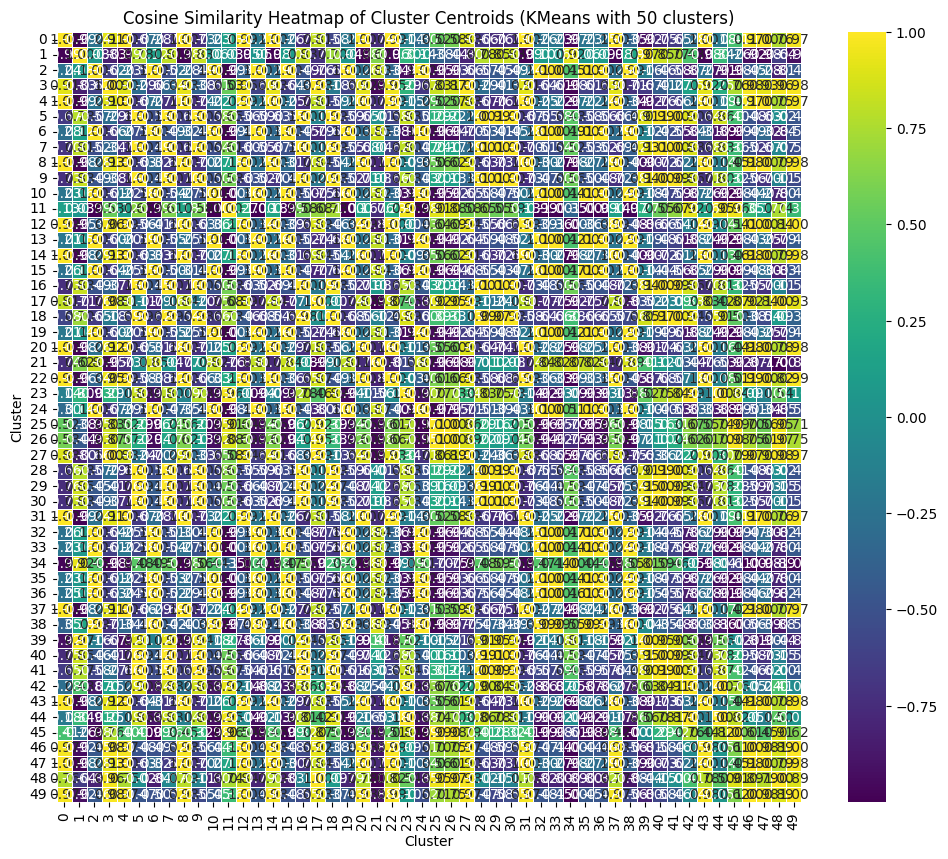

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
centroids = kmeans.cluster_centers_

# Calculate cosine similarity matrix for the centroids
cosine_sim_matrix = cosine_similarity(centroids)

# Plot the cosine similarity matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title(f'Cosine Similarity Heatmap of Cluster Centroids (KMeans with {no_clusters} clusters)')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have the vectorizer and the transformed data as shown:
# vectorizer = TfidfVectorizer(max_features=500, lowercase=True, stop_words="english", ngram_range=(1, 2))
# X = vectorizer.fit_transform(cleaned_df['Tags'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print("Feature Names (Words or N-grams):")
print(feature_names)
print(len(feature_names))


Feature Names (Words or N-grams):
['2016' '2018' '2020' '2020 beijing' '2020 tokyo' '2021' '2021 olympic'
 '2022' '2022 olympic' '2022 olympics' '2023' '2024' '24x7'
 '24x7 breaking' '24x7 english' '4k' 'activision' 'affairs'
 'affairs latest' 'africa' 'african' 'alonso' 'alonso lamine' 'america'
 'american' 'ancelotti' 'ancelotti レアル' 'angular' 'animal'
 'animal documentary' 'animals' 'animals wildlife' 'ansu' 'asian'
 'asian games' 'atp' 'attack' 'attack strategy' 'attacks' 'attacks clash'
 'attenborough' 'baby' 'balde' 'balde lewy' 'bangladesh' 'barcelona'
 'barcelona camp' 'barcelona برشلونة' 'barça' 'barça sport' 'base' 'bbc'
 'bbc bbc' 'bbc bbcearth' 'bbc documentary' 'bbc earth' 'bbc news'
 'bbc world' 'bbcearth' 'bbcearth bbc' 'beginners' 'beijing'
 'beijing 2022' 'beijing2022' 'beijing2022 beijing' 'benzema' 'bernabéu'
 'bernabéu bernabéu' 'bernabéu hala' 'best' 'best food' 'black'
 'black ops' 'breaking' 'breaking news' 'budget' 'bundesliga' 'busquets'
 'camp' 'camp nou' 'can

In [29]:

feature_names = vectorizer.get_feature_names_out()


dense_matrix = X.toarray() 
tfidf_df = pd.DataFrame(dense_matrix, columns=feature_names)


print(tfidf_df)


      2016  2018      2020  2020 beijing  2020 tokyo  2021  2021 olympic  \
0      0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
1      0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
2      0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
3      0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
4      0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
...    ...   ...       ...           ...         ...   ...           ...   
1932   0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
1933   0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
1934   0.0   0.0  0.000000           0.0         0.0   0.0           0.0   
1935   0.0   0.0  0.295123           0.0         0.0   0.0           0.0   
1936   0.0   0.0  0.361898           0.0         0.0   0.0           0.0   

      2022  2022 olympic  2022 olympics  ...  مدريد 레알  サッカー  サッカー كرة  マドリード  \
0     

In [ ]:

with open("vector.pkl",'wb') as f:
    pickle.dump(vectorizer,f)

with open("model.pkl",'wb') as f:
    pickle.dump(kmeans,f)

In [ ]:
cleaned_df

In [37]:
# Get cluster labels for each data point
labels = kmeans.labels_

# Create a new column in your original DataFrame to see which cluster each tag belongs to
cleaned_df['Cluster'] = labels

# Display the first few rows to see the assigned clusters
print(cleaned_df[['Tags', 'Cluster']])


                                                   Tags  Cluster
0     cricket sports cricket highlights sports highl...       79
1     champions league uefa champions league uefa ch...       59
2     champions league uefa champions league uefa ch...       59
3     DFL Super Cup DFL Super Cup live DFL Super Cup...       59
4     uefa super cup super cup football football mat...       59
...                                                 ...      ...
1980  Free Documentary Documentaries Full documentar...       87
1984                                                           6
1985                                                           6
1986  lion documentary lions lions 2020 lion documen...       89
1987  lion documentary lions lions 2020 lion documen...       89

[1937 rows x 2 columns]


In [18]:
cleaned_df

,Unnamed: 0,Video_Id,Channel_Id,Channel_Title,Title,Url,Tags,View_Count,Like_Count,Comment_Count,Duration,Cluster
0,0,aFqPPAZcB0g,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,1st Test Day 1 | Highlights | Sri Lanka Tour O...,https://i.ytimg.com/vi/aFqPPAZcB0g/mqdefault.jpg,cricket sports cricket highlights sports highl...,77053.0,2486.0,24.0,PT19M59S,79
1,1,h7w-DAjKIW4,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Young Boys vs Galatasaray | Key Moments | UEFA...,https://i.ytimg.com/vi/h7w-DAjKIW4/mqdefault.jpg,champions league uefa champions league uefa ch...,788.0,32.0,2.0,PT8M6S,59
2,2,01J6iADTaM0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Dynamo Kyiv vs FC Salzburg | Key Moments | UEF...,https://i.ytimg.com/vi/01J6iADTaM0/mqdefault.jpg,champions league uefa champions league uefa ch...,184.0,6.0,0.0,PT6M40S,59
3,3,cb6_MGRjx0o,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Bayer Leverkusen vs VfB Stuttgart | Final | Hi...,https://i.ytimg.com/vi/cb6_MGRjx0o/mqdefault.jpg,DFL Super Cup DFL Super Cup live DFL Super Cup...,9472.0,346.0,10.0,PT10M5S,59
4,4,_1W3_keYqK0,UC_WKb6N9iTGc77hxwXLDrbA,Sony Sports Network,Real Madrid vs Atalanta | Final | Highlights |...,https://i.ytimg.com/vi/_1W3_keYqK0/mqdefault.jpg,uefa super cup super cup football football mat...,154382.0,3837.0,48.0,PT8M5S,59
...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1980,dz3eGdW_s64,UCQtW2oz8ec8pHjjxawujNjg,Free Documentary - Nature,The Big Blue - Ocean Stories from Down Under |...,https://i.ytimg.com/vi/dz3eGdW_s64/mqdefault.jpg,Free Documentary Documentaries Full documentar...,6443.0,202.0,9.0,PT43M41S,87
1984,1984,gZkcExDOQnY,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Times Mongooses and Cobras Take the Stage,https://i.ytimg.com/vi/gZkcExDOQnY/mqdefault.jpg,,1122.0,18.0,6.0,PT8M7S,6
1985,1985,BV-6NBLVE6g,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,10 Moments When Hyenas Brutally Attack Babies,https://i.ytimg.com/vi/BV-6NBLVE6g/mqdefault.jpg,,1361.0,24.0,5.0,PT8M4S,6
1986,1986,4oavOSGo39w,UCz73YrQjemoqx6ZvVfJDAew,WildLife Tales,Wild Life - Lion Pride Documentary 2020 Full H...,https://i.ytimg.com/vi/4oavOSGo39w/mqdefault.jpg,lion documentary lions lions 2020 lion documen...,190573.0,2882.0,187.0,PT48M4S,89


In [19]:
# Extract feature names from the TF-IDF vectorizer
terms = vectorizer.get_feature_names_out()

# Get the indices of the top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Print the top terms per cluster
for i in range(no_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:  # Display top 10 terms per cluster
        print(f' {terms[ind]}')
    print("\n")


Cluster 0:
 news
 ndtv
 24x7
 live
 affairs
 current affairs
 current
 news current
 latest
 latest news


Cluster 1:
 mumbai
 food
 attack
 india
 street food
 street
 indian
 live
 best food
 eat


Cluster 2:
 documentary
 nature
 free documentary
 free
 wildlife
 wildlife documentary
 documentary nature
 national
 topic documentary
 documentary topic


Cluster 3:
 madrid
 real madrid
 real
 bernabéu
 madrid real
 santiago
 hala madrid
 hala
 santiago bernabéu
 bernabéu bernabéu


Cluster 4:
 joao
 lewandowski
 barcelona
 jong
 busquets
 nou ter
 dembele
 club barcelona
 barcelona camp
 pedri


Cluster 5:
 duty
 cod
 modern warfare
 warfare
 modern
 season
 gaming
 multiplayer
 warzone
 trailer


Cluster 6:
 budget
 video
 videos
 life
 shah
 champions
 asian
 2024
 web
 bbc


Cluster 7:
 olympic
 2020
 games
 olympic games
 olympics
 2021
 tokyo
 games 2020
 games olympic
 2022


Cluster 8:
 world service
 service
 bbc
 world
 radio
 podcast
 bbc world
 podcasts
 documentaries
 podc

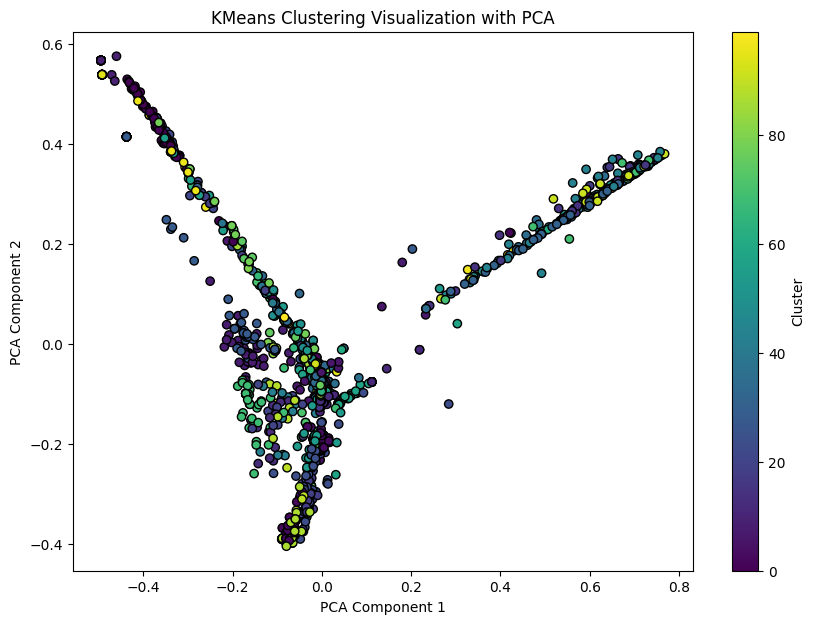

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the PCA results with cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [22]:
pca

PCA(n_components=2)

In [21]:
X_pca

array([[ 0.01046441, -0.05312869],
       [-0.00914877, -0.0823836 ],
       [-0.00914877, -0.0823836 ],
       ...,
       [-0.00126007, -0.05734078],
       [-0.04066206, -0.3043847 ],
       [-0.04470142, -0.31106475]])

In [32]:
cleaned_df['Tags']

0       cricket sports cricket highlights sports highl...
1       champions league uefa champions league uefa ch...
2       champions league uefa champions league uefa ch...
3       DFL Super Cup DFL Super Cup live DFL Super Cup...
4       uefa super cup super cup football football mat...
                              ...                        
1980    Free Documentary Documentaries Full documentar...
1984                                                     
1985                                                     
1986    lion documentary lions lions 2020 lion documen...
1987    lion documentary lions lions 2020 lion documen...
Name: Tags, Length: 1937, dtype: object

In [34]:
cleaned_df['Cluster']

0       79
1       59
2       59
3       59
4       59
        ..
1980    87
1984     6
1985     6
1986    89
1987    89
Name: Cluster, Length: 1937, dtype: int32